### Q2. F = (f 1 , f 2 , f 3 )

> **Handling Real Values**: Since precision only upto 2 decimal places is required, I multiplied number with 100; typecast to integer and the convert this into binary form for mutation or crossover. 

#### Part1: Random Search
> Random Search over space (-2.04, 2.04)<br/>

> **Searching for dominating solution**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def f1(X):
    X = [x**2 for x in X]
    return np.sum(X)

def f2(X):
    X = [np.floor(x) for x in X]
    return np.sum(X)

def f3(X):
    X = [(i+1)*(x**4) for i, x in enumerate(X)]
    return np.sum(X) + np.random.randn()

def getRandomNumber():
    np.random.seed(np.random.randint(int(time.time())))
    x = np.random.rand()
    return round((4.08*x - 2.04), 2)

def dominating(X1, X2):
    cnt = 0
    if(f1(X1) > f1(X2)):
        cnt+=1
    if(f2(X1) > f2(X2)):
        cnt+=1
    if(f3(X1) > f3(X2)):
        cnt+=1
    
    if(cnt>1):
        return True
    return False

#############CHANGE PARAMETERS HERE #######################
epochs = 100
###########################################################

X = [getRandomNumber() for _ in range(5)]
optimalX = X

f1List = []
f2List = []
f3List = []

for i in range(epochs):
    X = [getRandomNumber() for _ in range(5)]
    if(dominating(X, optimalX)):      #if X is dominating optimal X
        optimalX = X
    f1List.append(f1(optimalX))
    f2List.append(f2(optimalX))
    f3List.append(f3(optimalX))
        
print("Function Value(f1, f2, f3) = ", f1(optimalX), f2(optimalX), f3(optimalX))
print("OPTIMAL X = ", optimalX)

fig, ax = plt.subplots(3, 1, sharex = 'col', sharey = 'row')
fig.set_size_inches(9, 12)
ax[0].plot(f1List)
ax[1].plot(f2List)
ax[2].plot(f3List)
ax[0].set_title("f1(optimal X) vs iter")
ax[1].set_title("f2(optimal X) vs iter")
ax[2].set_title("f3(optimal X) vs iter")
ax[0].set_xlabel('Iteration')
ax[1].set_xlabel('Iteration')
ax[2].set_xlabel('Iteration')

Function Value(f1, f2, f3) =  14.837399999999999 6.0 156.1879242640944
OPTIMAL X =  [1.99, 1.38, 1.18, 2.03, 1.86]


Text(0.5,0,'Iteration')

## Part2:Basic Genetic Algorithm
#### 2.a Dominating Solution

In [2]:
import time
import numpy as np
import copy

################### CHANGE PARAMETERS HERE  #####################
population = []
Min = -2.04
Max = 2.04
populationSize = 50
epochs = 50
mutProb = 0.01
crossProb = 0.2
poolsize = 50
#################################################################

def fittestInPopulation(population):
    best1 = population[0]
    index = 0
    for x in population:
        if(dominating(x, best1)):
            best1 = x
            index = x
    
    return best1, index

#Take a num and returns new number after mutation
def mutation(numList):
    newList = []
    for num in numList:
        binary = bin(int(num*100)).replace('0b','')

        if(num < 0):
            r_ind = np.random.randint(1, len(binary))
        else:
            r_ind = np.random.randint(len(binary))

        sList = list(binary)
        sList[r_ind] = str(1 - int(sList[r_ind]))
        binary = ''.join(sList)
        x = round(int(binary, 2)/100, 2)
        if(x < Min or x > Max):
            x = num
        if(np.random.rand() < 0.5):
            x = -x
        newList.append(x)
    return newList

#Cross Over
def crossOver(num1List, num2List):
    newList1 = []
    newList2 = []
    for (num1, num2) in zip(num1List, num2List):

        binary1 = bin(int(num1*100)).replace('0b','')
        binary2 = bin(int(num2*100)).replace('0b','')

        r1_ind = np.random.randint(min(len(binary1), len(binary2)))

        binary1_1 = binary1[:r1_ind] + binary2[r1_ind:]
        binary1_2 = binary2[:r1_ind] + binary1[r1_ind:]

        x1 = round(int(binary1_1, 2)/100, 2)
        x2 = round(int(binary1_2, 2)/100, 2)

        if(x1 < Min or x1 > Max or x2 < Min or x2 > Max):
            x1, x2 =  num1, num2

        if(np.random.rand() < 0.5):
            x1 = -x1
        if(np.random.rand() < 0.5):
            x2 = -x2
            
        newList1.append(x1)
        newList2.append(x2)

    return newList1, newList2

#Takes numList and return one best
def selection(numList):
    best1 = numList[0]
    for num in numList:
        if(dominating(num, best1)):
            best1 = num
    
    return best1

#Decision making for crossover
def doCrossOver():
    return np.random.rand() <= crossProb

#Decision making for mutation
def doMutation():
    return np.random.rand() <= mutProb

def v(num1List, num2List):
#     print("s1 = ", s1, s2)
    if(doCrossOver()): 
        num1List, num2List = crossOver(num1List, num2List)
    
    offSpringList1 = []
    offSpringList2 = []
    for i in range(poolsize):
        #Pool1
        tempList1 = copy.copy(num1List)
        tempList2 = copy.copy(num2List)

        if(doMutation()):
            tempList1 = mutation(tempList1)
            offSpringList1.append(tempList1)

        #Pool2
        if(doMutation()):
            tempList2 = mutation(tempList2)
            offSpringList2.append(tempList2)

    #Selection
    offSpringList1.append(num1List)
    offSpringList1.append(num2List)
    offSpringList1+=offSpringList2   #Pool
    best1 = selection(offSpringList1)
        
    return best1

def initializePopulation():
    for i in range(populationSize):
        population.append([getRandomNumber() for _ in range(5)])

def geneticAlgorithm1():
    f1List = []
    f2List = []
    f3List = []
    global population
    initializePopulation()
    res, index = fittestInPopulation(population)
    iter1 = 0
    print(res)
    while(iter1 < epochs):
        newPopulation = []
        for i in range(populationSize): 
            np.random.seed(np.random.randint(int(time.time())))
            parent1 = np.random.randint(populationSize)
            parent2 = np.random.randint(populationSize)
            bestOffSpring = v(population[parent1], population[parent2])
            if(dominating(bestOffSpring, res)):
                res = bestOffSpring
            newPopulation.append(bestOffSpring)
        iter1+=1
        f1List.append(f1(res))
        f2List.append(f2(res))
        f3List.append(f3(res))
        if(iter1%10 == 0):
            print("Iter: ", iter1)
        population = newPopulation

    print("============ BASIC GENEIC ALGORITHM 1 ===========")
    print("Found Dominating Solution in iteration = " , epochs, "OptimalX = ", res)
    print("Optimal Values(f1 f2 f3) = ", f1(res), f2(res), f3(res))
    
    fig, ax = plt.subplots(3, 1, sharex = 'col', sharey = 'row')
    fig.set_size_inches(9, 12)
    ax[0].plot(f1List)
    ax[1].plot(f2List)
    ax[2].plot(f3List)
    ax[0].set_title("f1(optimal X) vs iter")
    ax[1].set_title("f2(optimal X) vs iter")
    ax[2].set_title("f3(optimal X) vs iter")
    ax[0].set_xlabel('Iteration')
    ax[1].set_xlabel('Iteration')
    ax[2].set_xlabel('Iteration')

[1.58, -1.12, -1.76, -0.41, 1.98]
Iter:  10
Iter:  20
Iter:  30
Iter:  40
Iter:  50
============ BASIC GENEIC ALGORITHM 1 ===========
Found Dominating Solution in iteration =  50 OptimalX =  [2.04, 2.03, 1.91, 1.91, 1.99]
Optimal Values(f1 f2 f3) =  19.5388 7.0 222.3559913603289


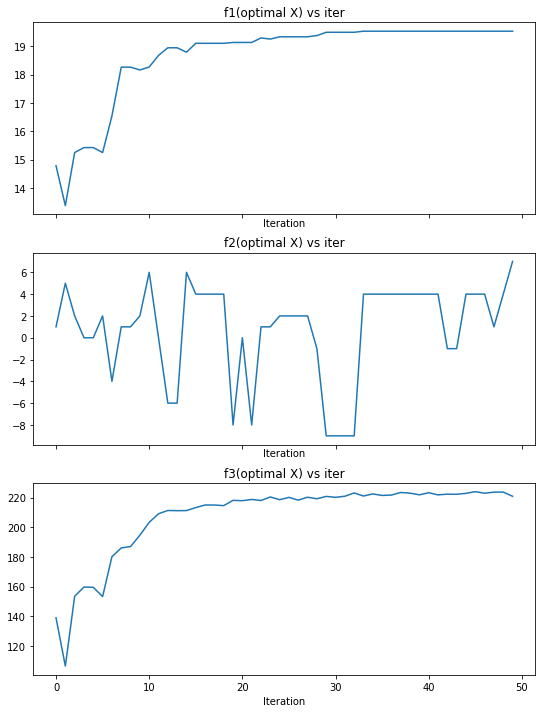

In [3]:
geneticAlgorithm1()

#### 2.b Maximizing f1(X) + f2(x) + f3(X)

In [4]:
import time
import numpy as np
import copy

################### CHANGE PARAMETERS HERE  #####################
population = []
Min = -2.04
Max = 2.04
populationSize = 50
epochs = 50
mutProb = 0.01
crossProb = 0.2
poolsize = 50
#################################################################

def value(x1):
    return f1(x1) + f2(x1) + f3(x1)

def fittestInPopulation(population):
    best1 = population[0]
    index = 0
    for x in population:
        if(value(x) > value(best1)):
            best1 = x
            index = x
    
    return best1, index

#Take a num and returns new number after mutation
def mutation(numList):
    newList = []
    for num in numList:
        binary = bin(int(num*100)).replace('0b','')

        if(num < 0):
            r_ind = np.random.randint(1, len(binary))
        else:
            r_ind = np.random.randint(len(binary))

        sList = list(binary)
        sList[r_ind] = str(1 - int(sList[r_ind]))
        binary = ''.join(sList)
        x = round(int(binary, 2)/100, 2)
        if(x < Min or x > Max):
            x = num
        if(np.random.rand() < 0.5):
            x = -x
        newList.append(x)
    return newList

#Cross Over
def crossOver(num1List, num2List):
    newList1 = []
    newList2 = []
    for (num1, num2) in zip(num1List, num2List):

        binary1 = bin(int(num1*100)).replace('0b','')
        binary2 = bin(int(num2*100)).replace('0b','')

        r1_ind = np.random.randint(min(len(binary1), len(binary2)))

        binary1_1 = binary1[:r1_ind] + binary2[r1_ind:]
        binary1_2 = binary2[:r1_ind] + binary1[r1_ind:]

        x1 = round(int(binary1_1, 2)/100, 2)
        x2 = round(int(binary1_2, 2)/100, 2)

        if(x1 < Min or x1 > Max or x2 < Min or x2 > Max):
            x1, x2 =  num1, num2

        if(np.random.rand() < 0.5):
            x1 = -x1
        if(np.random.rand() < 0.5):
            x2 = -x2
            
        newList1.append(x1)
        newList2.append(x2)

    return newList1, newList2

#Takes numList and return one best
def selection(numList):
    best1 = numList[0]
    for num in numList:
        if value(num)> value(best1):
            best1 = num
    
    return best1

#Decision making for crossover
def doCrossOver():
    return np.random.rand() <= crossProb

#Decision making for mutation
def doMutation():
    return np.random.rand() <= mutProb

def v(num1List, num2List):
#     print("s1 = ", s1, s2)
    if(doCrossOver()): 
        num1List, num2List = crossOver(num1List, num2List)
    
    offSpringList1 = []
    offSpringList2 = []
    for i in range(poolsize):
        #Pool1
        tempList1 = copy.copy(num1List)
        tempList2 = copy.copy(num2List)

        if(doMutation()):
            tempList1 = mutation(tempList1)
            offSpringList1.append(tempList1)

        #Pool2
        if(doMutation()):
            tempList2 = mutation(tempList2)
            offSpringList2.append(tempList2)

    #Selection
    offSpringList1.append(num1List)
    offSpringList1.append(num2List)
    offSpringList1+=offSpringList2   #Pool
    best1 = selection(offSpringList1)
        
    return best1

def initializePopulation():
    for i in range(populationSize):
        population.append([getRandomNumber() for _ in range(5)])

def geneticAlgorithm2():
    fList = []
    global population
    initializePopulation()
    res, index = fittestInPopulation(population)
    bestVal = value(res)
    iter1 = 0
    while(iter1 < epochs):
        newPopulation = []
        for i in range(populationSize): 
            np.random.seed(np.random.randint(int(time.time())))
            parent1 = np.random.randint(populationSize)
            parent2 = np.random.randint(populationSize)
            bestOffSpring = v(population[parent1], population[parent2])
            if(value(bestOffSpring) > bestVal):
                bestVal = value(bestOffSpring)
                res = bestOffSpring
            newPopulation.append(bestOffSpring)
        iter1+=1
        fList.append(value(res))
        if(iter1%10 == 0):
            print("Iter: ", iter1)
        population = newPopulation

    print("Found Goal in iteration = " , iter1, "Goal = ", res,  "Value = ", bestVal)
    plt.plot(fList)
    plt.title("f1 + f2 + f3 vs iter")

Iter:  10
Iter:  20
Iter:  30
Iter:  40
Iter:  50
Found Goal in iteration =  50 Goal =  [2.02, 2.02, 2.04, 1.99, 2.02] Value =  276.29563821904725


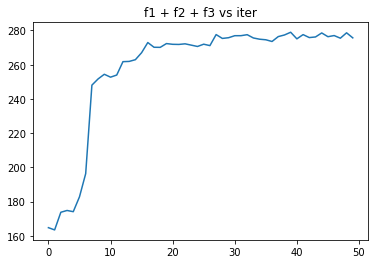

In [5]:
geneticAlgorithm2()

---

#### Part3: GA with Etilism

In [6]:
import time
import numpy as np
import copy

################### CHANGE PARAMETERS HERE  #####################
population = []
Min = -2.04
Max = 2.04
populationSize = 50
epochs = 50
mutProb = 0.01
crossProb = 0.2
poolsize = 50
#################################################################

def fittestInPopulation(population):
    best1 = population[0]
    index = 0
    for x in population:
        if(dominating(x, best1)):
            best1 = x
            index = x
    
    return best1, index

#Take a num and returns new number after mutation
def mutation(numList):
    newList = []
    for num in numList:
        binary = bin(int(num*100)).replace('0b','')

        if(num < 0):
            r_ind = np.random.randint(1, len(binary))
        else:
            r_ind = np.random.randint(len(binary))

        sList = list(binary)
        sList[r_ind] = str(1 - int(sList[r_ind]))
        binary = ''.join(sList)
        x = round(int(binary, 2)/100, 2)
        if(x < Min or x > Max):
            x = num
        if(np.random.rand() < 0.5):
            x = -x
        newList.append(x)
    return newList

#Cross Over
def crossOver(num1List, num2List):
    newList1 = []
    newList2 = []
    for (num1, num2) in zip(num1List, num2List):

        binary1 = bin(int(num1*100)).replace('0b','')
        binary2 = bin(int(num2*100)).replace('0b','')

        r1_ind = np.random.randint(min(len(binary1), len(binary2)))

        binary1_1 = binary1[:r1_ind] + binary2[r1_ind:]
        binary1_2 = binary2[:r1_ind] + binary1[r1_ind:]

        x1 = round(int(binary1_1, 2)/100, 2)
        x2 = round(int(binary1_2, 2)/100, 2)

        if(x1 < Min or x1 > Max or x2 < Min or x2 > Max):
            x1, x2 =  num1, num2

        if(np.random.rand() < 0.5):
            x1 = -x1
        if(np.random.rand() < 0.5):
            x2 = -x2
            
        newList1.append(x1)
        newList2.append(x2)

    return newList1, newList2

#Takes numList and return one best
def selection(numList):
    best1 = numList[0]
    for num in numList:
        if(dominating(num, best1)):
            best1 = num
    
    return best1

#Decision making for crossover
def doCrossOver():
    return np.random.rand() <= crossProb

#Decision making for mutation
def doMutation():
    return np.random.rand() <= mutProb

def v(num1List, num2List):
#     print("s1 = ", s1, s2)
    if(doCrossOver()): 
        num1List, num2List = crossOver(num1List, num2List)
    
    offSpringList1 = []
    offSpringList2 = []
    for i in range(poolsize):
        #Pool1
        tempList1 = copy.copy(num1List)
        tempList2 = copy.copy(num2List)

        if(doMutation()):
            tempList1 = mutation(tempList1)
            offSpringList1.append(tempList1)

        #Pool2
        if(doMutation()):
            tempList2 = mutation(tempList2)
            offSpringList2.append(tempList2)

    #Selection
    offSpringList1.append(num1List)
    offSpringList1.append(num2List)
    offSpringList1+=offSpringList2   #Pool
    best1 = selection(offSpringList1)
        
    return best1

def initializePopulation():
    for i in range(populationSize):
        population.append([getRandomNumber() for _ in range(5)])

def gaElitism1():
    f1List = []
    f2List = []
    f3List = []
    global population
    initializePopulation()
    #Fittest in Current Population
    res, index = fittestInPopulation(population)
    
    #================ Elitism Step =======================
    #Pass fittest in current population to next generation
    newPopulation = []
    newPopulation.append(res)
    #================ ____________ =======================
    
    iter1 = 0
    print("Optimal from Initial Population: ",res)
    while(iter1 < epochs):
        newPopulation = []
        for i in range(populationSize - 1): 
            np.random.seed(np.random.randint(int(time.time())))
            parent1 = np.random.randint(populationSize - 1)
            parent2 = np.random.randint(populationSize - 1)
            bestOffSpring = v(population[parent1], population[parent2])
            if(dominating(bestOffSpring, res)):
                res = bestOffSpring
            newPopulation.append(bestOffSpring)
        iter1+=1
        f1List.append(f1(res))
        f2List.append(f2(res))
        f3List.append(f3(res))
        if(iter1%10 == 0):
            print("Iter: ", iter1)
        population = newPopulation

    print("============ GA WITH ELITISM 1 ===========")
    print("Found Dominating Solution in iteration = " , epochs, "Optimal X = ", res)
    print("Optimal Values(f1 f2 f3) = ", f1(res), f2(res), f3(res))
    
    fig, ax = plt.subplots(3, 1, sharex = 'col', sharey = 'row')
    fig.set_size_inches(9, 12)
    ax[0].plot(f1List)
    ax[1].plot(f2List)
    ax[2].plot(f3List)
    ax[0].set_title("f1(optimal X) vs iter")
    ax[1].set_title("f2(optimal X) vs iter")
    ax[2].set_title("f3(optimal X) vs iter")
    ax[0].set_xlabel('Iteration')
    ax[1].set_xlabel('Iteration')
    ax[2].set_xlabel('Iteration')

Optimal from Initial Population:  [-2.04, 1.88, 1.93, -1.37, 1.05]
Iter:  10
Iter:  20
Iter:  30
Iter:  40
Iter:  50
============ GA WITH ELITISM 1 ===========
Found Dominating Solution in iteration =  50 Optimal X =  [1.91, 2.02, 2.04, 2.04, 1.91]
Optimal Values(f1 f2 f3) =  19.6998 8.0 234.36691265706378


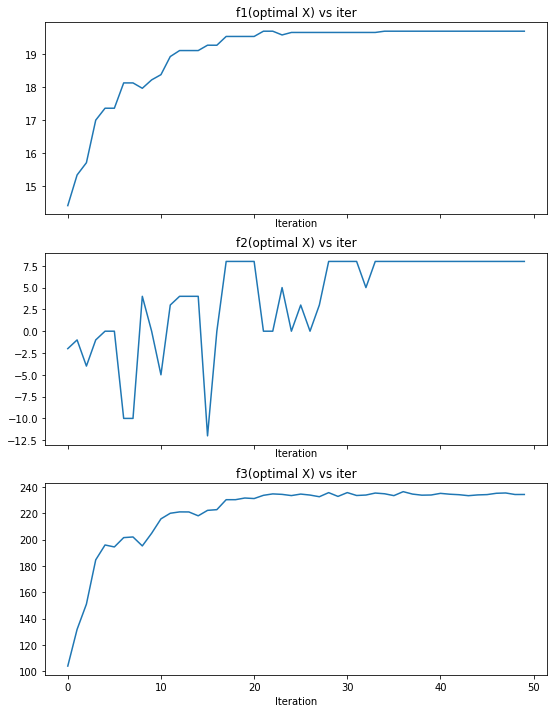

In [7]:
gaElitism1()

#### 3.b Maximizing f1(X) + f2(x) + f3(X)

In [8]:
import time
import numpy as np
import copy

################### CHANGE PARAMETERS HERE  #####################
population = []
Min = -2.04
Max = 2.04
populationSize = 50
epochs = 50
mutProb = 0.01
crossProb = 0.2
poolsize = 50
#################################################################

def value(x1):
    return f1(x1) + f2(x1) + f3(x1)

def fittestInPopulation(population):
    best1 = population[0]
    index = 0
    for x in population:
        if(value(x) > value(best1)):
            best1 = x
            index = x
    
    return best1, index

#Take a num and returns new number after mutation
def mutation(numList):
    newList = []
    for num in numList:
        binary = bin(int(num*100)).replace('0b','')

        if(num < 0):
            r_ind = np.random.randint(1, len(binary))
        else:
            r_ind = np.random.randint(len(binary))

        sList = list(binary)
        sList[r_ind] = str(1 - int(sList[r_ind]))
        binary = ''.join(sList)
        x = round(int(binary, 2)/100, 2)
        if(x < Min or x > Max):
            x = num
        if(np.random.rand() < 0.5):
            x = -x
        newList.append(x)
    return newList

#Cross Over
def crossOver(num1List, num2List):
    newList1 = []
    newList2 = []
    for (num1, num2) in zip(num1List, num2List):

        binary1 = bin(int(num1*100)).replace('0b','')
        binary2 = bin(int(num2*100)).replace('0b','')

        r1_ind = np.random.randint(min(len(binary1), len(binary2)))

        binary1_1 = binary1[:r1_ind] + binary2[r1_ind:]
        binary1_2 = binary2[:r1_ind] + binary1[r1_ind:]

        x1 = round(int(binary1_1, 2)/100, 2)
        x2 = round(int(binary1_2, 2)/100, 2)

        if(x1 < Min or x1 > Max or x2 < Min or x2 > Max):
            x1, x2 =  num1, num2

        if(np.random.rand() < 0.5):
            x1 = -x1
        if(np.random.rand() < 0.5):
            x2 = -x2
            
        newList1.append(x1)
        newList2.append(x2)

    return newList1, newList2

#Takes numList and return one best
def selection(numList):
    best1 = numList[0]
    for num in numList:
        if(dominating(num, best1)):
            best1 = num
    
    return best1

#Decision making for crossover
def doCrossOver():
    return np.random.rand() <= crossProb

#Decision making for mutation
def doMutation():
    return np.random.rand() <= mutProb

def v(num1List, num2List):
#     print("s1 = ", s1, s2)
    if(doCrossOver()): 
        num1List, num2List = crossOver(num1List, num2List)
    
    offSpringList1 = []
    offSpringList2 = []
    for i in range(poolsize):
        #Pool1
        tempList1 = copy.copy(num1List)
        tempList2 = copy.copy(num2List)

        if(doMutation()):
            tempList1 = mutation(tempList1)
            offSpringList1.append(tempList1)

        #Pool2
        if(doMutation()):
            tempList2 = mutation(tempList2)
            offSpringList2.append(tempList2)

    #Selection
    offSpringList1.append(num1List)
    offSpringList1.append(num2List)
    offSpringList1+=offSpringList2   #Pool
    best1 = selection(offSpringList1)
        
    return best1

def initializePopulation():
    for i in range(populationSize):
        population.append([getRandomNumber() for _ in range(5)])

def gaElitism2():
    fList = []
    global population
    initializePopulation()
    #Fittest in Current Population
    res, index = fittestInPopulation(population)
    bestVal = value(res)
    
    #================ Elitism Step =======================
    #Pass fittest in current population to next generation
    newPopulation = []
    newPopulation.append(res)
    #================ ____________ =======================
    
    iter1 = 0
    print("Optimal from Initial Population: ",res)
    while(iter1 < epochs):
        newPopulation = []
        for i in range(populationSize - 1): 
            np.random.seed(np.random.randint(int(time.time())))
            parent1 = np.random.randint(populationSize - 1)
            parent2 = np.random.randint(populationSize - 1)
            bestOffSpring = v(population[parent1], population[parent2])
            if(value(bestOffSpring) > bestVal):
                bestVal = value(bestOffSpring)
                res = bestOffSpring
            newPopulation.append(bestOffSpring)
        iter1+=1
        fList.append(value(res))
        if(iter1%10 == 0):
            print("Iter: ", iter1)
        population = newPopulation

    print("============ GA WITH ELITISM 1 ===========")
    print("Found Dominating Solution in iteration = " , epochs, "Optimal X = ", res)
    print("Optimal Values(f1 + f2 + f3) = ", value(res))
    
    plt.plot(fList)
    plt.title("f1 + f2 + f3 vs Iter")
    plt.show()

Optimal from Initial Population:  [-1.86, -0.49, -1.97, 1.86, -1.83]
Iter:  10
Iter:  20
Iter:  30
Iter:  40
Iter:  50
============ GA WITH ELITISM 1 ===========
Found Dominating Solution in iteration =  50 Optimal X =  [1.91, 1.91, 2.04, 2.03, -1.91]
Optimal Values(f1 + f2 + f3) =  250.62083702593597


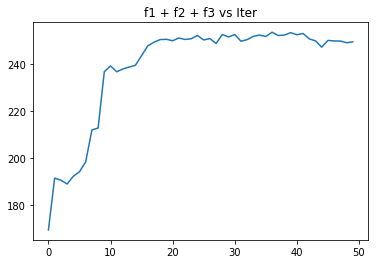

In [9]:
gaElitism2()

---

#### Part4: GA with Diversity

#### 4.a Dominating Solution

In [10]:
################### CHANGE PARAMETERS HERE  #####################
population = []
Min = -2.04
Max = 2.04
populationSize = 50
epochs = 50
mutProb = 0.01
crossProb = 0.2
poolsize = 50
#################################################################

#============== DIVERSITY STEP ================
def mutationProb(population):
    valueList = [value(x) for x in population]
    
    f = np.mean(valueList)
    asd = np.std(valueList)            # Average Square Deviation
    
    prob = mutProb * (1 + ((f - asd)/ (f + asd)))
    
    return prob

def doMutation(prob):
    return np.random.rand() <= prob

#==============________________======================

def fittestInPopulation(population):
    best1 = population[0]
    index = 0
    for x in population:
        if(dominating(x, best1)):
            best1 = x
            index = x
    
    return best1, index

#Takes numList and return one best
def selection(numList):
    best1 = numList[0]
    for num in numList:
        if(dominating(num, best1)):
            best1 = num
    
    return best1

def v1(num1List, num2List, population):
    probMutation = mutationProb(population)
#     print("s1 = ", s1, s2)
    if(doCrossOver()): 
        num1List, num2List = crossOver(num1List, num2List)
    
    offSpringList1 = []
    offSpringList2 = []
    for i in range(poolsize):
        #Pool1
        tempList1 = copy.copy(num1List)
        tempList2 = copy.copy(num2List)

        if(doMutation(probMutation)):
            tempList1 = mutation(tempList1)
            offSpringList1.append(tempList1)

        #Pool2
        if(doMutation(probMutation)):
            tempList2 = mutation(tempList2)
            offSpringList2.append(tempList2)

    #Selection
    offSpringList1.append(num1List)
    offSpringList1.append(num2List)
    offSpringList1+=offSpringList2   #Pool
    best1 = selection(offSpringList1)
        
    return best1

def initializePopulation():
    for i in range(populationSize):
        population.append([getRandomNumber() for _ in range(5)])

def gaDiversity1():
    f1List = []
    f2List = []
    f3List = []
    
    global population
    initializePopulation()
    #Fittest in Current Population
    res, index = fittestInPopulation(population)
    
    iter1 = 0
    print("Optimal from Initial Population: ",res)
    while(iter1 < epochs):
        newPopulation = []
        for i in range(populationSize): 
            np.random.seed(np.random.randint(int(time.time())))
            parent1 = np.random.randint(populationSize)
            parent2 = np.random.randint(populationSize)
            bestOffSpring = v1(population[parent1], population[parent2], population)
            if(dominating(bestOffSpring, res)):
                res = bestOffSpring
            newPopulation.append(bestOffSpring)
        iter1+=1
        f1List.append(f1(res))
        f2List.append(f2(res))
        f3List.append(f3(res))
        if(iter1%10 == 0):
            print("Iter: ", iter1)
        population = newPopulation

    print("============ GA WITH DIVERSITY 1 ===========")
    print("Found Dominating Solution in iteration = " , epochs, "Optimal X = ", res)
    print("Optimal Values(f1  f2  f3) = ", f1(res), f2(res), f3(res))
    
    fig, ax = plt.subplots(3, 1, sharex = 'col', sharey = 'row')
    fig.set_size_inches(9, 12)
    ax[0].plot(f1List)
    ax[1].plot(f2List)
    ax[2].plot(f3List)
    ax[0].set_title("f1(optimal X) vs iter")
    ax[1].set_title("f2(optimal X) vs iter")
    ax[2].set_title("f3(optimal X) vs iter")
    ax[0].set_xlabel('Iteration')
    ax[1].set_xlabel('Iteration')
    ax[2].set_xlabel('Iteration')

Optimal from Initial Population:  [-1.71, -1.96, -1.22, -1.83, 2.02]
Iter:  10
Iter:  20
Iter:  30
Iter:  40
Iter:  50
============ GA WITH DIVERSITY 1 ===========
Found Dominating Solution in iteration =  50 Optimal X =  [2.03, 1.99, -2.03, 1.91, 2.03]
Optimal Values(f1  f2  f3) =  19.970899999999997 3.0 236.72371620192195


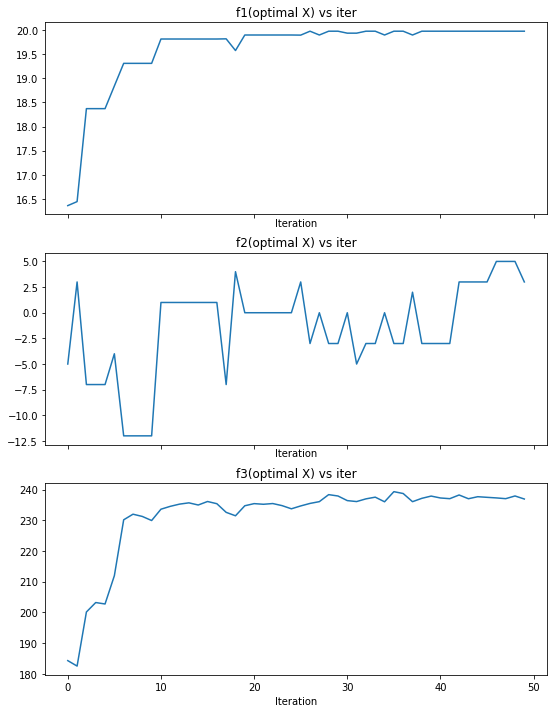

In [11]:
gaDiversity1()

#### 4.b Maximizing f1+f2+f3

In [14]:
################### CHANGE PARAMETERS HERE  #####################
population = []
Min = -2.04
Max = 2.04
populationSize = 50
epochs = 50
mutProb = 0.01
crossProb = 0.2
poolsize = 50
#################################################################

#============== DIVERSITY STEP ================
def mutationProb(population):
    valueList = [value(x) for x in population]
    
    f = np.mean(valueList)
    asd = np.std(valueList)            # Average Square Deviation
    
    prob = mutProb * (1 + ((f - asd)/ (f + asd)))
    
    return prob

def doMutation(prob):
    return np.random.rand() <= prob

#==============________________======================

def v1(num1List, num2List, population):
    probMutation = mutationProb(population)
#     print("s1 = ", s1, s2)
    if(doCrossOver()): 
        num1List, num2List = crossOver(num1List, num2List)
    
    offSpringList1 = []
    offSpringList2 = []
    for i in range(poolsize):
        #Pool1
        tempList1 = copy.copy(num1List)
        tempList2 = copy.copy(num2List)

        if(doMutation(probMutation)):
            tempList1 = mutation(tempList1)
            offSpringList1.append(tempList1)

        #Pool2
        if(doMutation(probMutation)):
            tempList2 = mutation(tempList2)
            offSpringList2.append(tempList2)

    #Selection
    offSpringList1.append(num1List)
    offSpringList1.append(num2List)
    offSpringList1+=offSpringList2   #Pool
    best1 = selection(offSpringList1)
        
    return best1

def initializePopulation():
    for i in range(populationSize):
        population.append([getRandomNumber() for _ in range(5)])

def gaDiversity2():
    fList = []
    global population
    initializePopulation()
    #Fittest in Current Population
    res, index = fittestInPopulation(population)
    bestVal = value(res)
    
    iter1 = 0
    print("Optimal from Initial Population: ",res)
    while(iter1 < epochs):
        newPopulation = []
        for i in range(populationSize): 
            np.random.seed(np.random.randint(int(time.time())))
            parent1 = np.random.randint(populationSize)
            parent2 = np.random.randint(populationSize)
            bestOffSpring = v1(population[parent1], population[parent2], population)
            if(value(bestOffSpring) > bestVal):
                bestVal = value(bestOffSpring)
                res = bestOffSpring
            newPopulation.append(bestOffSpring)
        iter1+=1
        fList.append(value(res))
        if(iter1%10 == 0):
            print("Iter: ", iter1)
        population = newPopulation

    print("============ GA WITH DIVERSITY 1 ===========")
    print("Found Dominating Solution in iteration = " , epochs, "Optimal X = ", res)
    print("Optimal Values(f1 + f2 + f3) = ", value(res))
    
    plt.plot(fList)
    plt.title("f1 + f2 + f3 vs Iter")

Optimal from Initial Population:  [2.0, -1.58, -1.87, -1.91, -1.84]
Iter:  10
Iter:  20
Iter:  30
Iter:  40
Iter:  50
============ GA WITH DIVERSITY 1 ===========
Found Dominating Solution in iteration =  50 Optimal X =  [1.99, 1.99, 2.04, 2.04, 2.04]
Optimal Values(f1 + f2 + f3) =  283.2965620929159


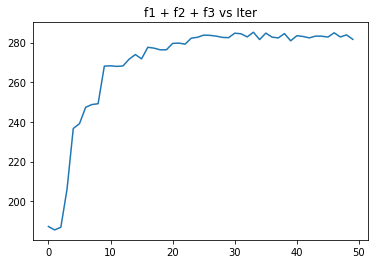

In [15]:
gaDiversity2()

#### Run Each Cell Individually(random seed problem)

---